In [16]:
import numpy as np
import pandas as pd
import polars as pl
import duckdb as db
import networkx as nx

import yfinance as yf
import quandl as ql

import altair as alt
import matplotlib.pyplot as plt
import gravis as gv

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from statsmodels.tsa.arima.model import ARIMA

from urllib.request import urlopen
from xmltodict import parse

import re
from itertools import combinations
from collections import Counter

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Lecture 2

## Python's Machine Learning Library Ecosystem

## Numpy

[Numpy](https://numpy.org/) is the main python library for matrix calculation and basic mathematical functions operating on matrices.

Modern data science workflows frequently require efficient computation over large collections of numerical data. Whether the task is linear algebra, statistical estimation, optimization, or simulation, it often boils down to performing operations on vectors and matrices. Python, by default, lacks an efficient multidimensional array structure and fast vectorized operations. This is where **NumPy** becomes indispensable.

**NumPy** (short for *Numerical Python*) is the foundational scientific computing library in Python. It provides:

* A powerful `ndarray` object for multidimensional homogeneous arrays.
* A suite of efficient, low-level mathematical functions implemented in C.
* Support for broadcasting and vectorized operations, which enable concise and fast numerical computations.
* Integration with a wide range of libraries such as `scikit-learn`, `pandas`, `matplotlib`, `tensorflow`, and others that rely on NumPy arrays as their basic data structure.

NumPy arrays serve as the universal currency for numerical computation in Python. Nearly every numerical or machine learning library uses them internally, making fluency in NumPy essential for working effectively in data science.

### Why Not Just Use Lists?

Python lists are flexible and can contain heterogeneous elements. However, they are not efficient for numerical computing:

* Lists are dynamically typed and individually reference each element, resulting in memory overhead.
* Operations like addition or multiplication must be implemented manually via loops.

In contrast, NumPy arrays:

* Are statically typed and contiguous in memory, which allows for optimized performance.
* Support fast, vectorized operations and broadcasting, eliminating the need for explicit loops in most cases.

### A Motivating Example

Suppose we want to simulate a linear transformation of a vector using a matrix:

$$
\mathbf{y} = M \cdot \mathbf{x}
$$

This operation, fundamental in linear regression, PCA, and neural networks, is elegantly expressed and efficiently computed in NumPy using `np.matmul(M, x)`.

We now turn to a demonstration of NumPy arrays and their capabilities.


In [17]:
# This is how you import a whole library
import numpy as np

### Basic Array Creation

In [18]:
# Create a 1D array
a = np.array([1, 2, 3])
print("1D array:", a)

# Create a 2D array (matrix)
M = np.array([[1, 2, 3], [4, 5, 6]])
print("2D array:\n", M)

# Shape and type
print("Shape of M:", M.shape)
print("Data type:", M.dtype)

1D array: [1 2 3]
2D array:
 [[1 2 3]
 [4 5 6]]
Shape of M: (2, 3)
Data type: int64


This introduces the `ndarray` object, its shape, and homogeneous typing.

### **Creating Arrays with Default Values**

In [20]:
np.zeros((2, 3))       # 2x3 matrix of zeros
np.ones((3, 2))        # 3x2 matrix of ones
np.eye(3)              # 3x3 identity matrix
np.full((2, 2), 7.5)   # 2x2 matrix filled with 7.5

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[7.5, 7.5],
       [7.5, 7.5]])

Also include:

In [21]:
np.arange(0, 10, 2)    # even numbers from 0 to 8
np.linspace(0, 1, 5)   # 5 points between 0 and 1

array([0, 2, 4, 6, 8])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Indexing and Slicing

In [22]:
x = np.array([10, 20, 30, 40, 50])
print(x[1])      # second element
print(x[1:4])    # slice from index 1 to 3
print(x[::-1])   # reverse array

20
[20 30 40]
[50 40 30 20 10]


For 2D arrays:

In [23]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A[1, 2])       # element at row 1, column 2
print(A[:, 1])       # all rows, column 1
print(A[0, :])       # first row

6
[2 5]
[1 2 3]


### Broadcasting and Vectorized Operations

In [24]:
x = np.array([1, 2, 3])
print(x + 1)         # elementwise addition
print(x * 2)         # elementwise multiplication
print(x ** 2)        # elementwise exponentiation

[2 3 4]
[2 4 6]
[1 4 9]


Broadcasting example:

In [25]:
A = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 0, 1])
print(A + b)         # broadcast b across rows

[[2 2 4]
 [5 5 7]]


### Aggregate Functions

In [26]:
a = np.array([1, 2, 3, 4])
print(np.sum(a))         # sum of all elements
print(np.mean(a))        # average
print(np.std(a))         # standard deviation
print(np.max(a))         # maximum value

10
2.5
1.118033988749895
4


### Linear Algebra Operations

In [27]:
x = np.array([[1], [2], [3]])
M = np.array([[1, 0, 2], [0, 1, -1], [1, 1, 0]])
y = np.matmul(M, x)
print("Matrix-vector product:\n", y)

Matrix-vector product:
 [[ 7]
 [-1]
 [ 3]]


Also show:

In [28]:
np.dot(M, x)             # equivalent for 2D arrays
np.transpose(M)          # transpose
np.linalg.inv(np.eye(3)) # inverse of identity

array([[ 7],
       [-1],
       [ 3]])

array([[ 1,  0,  1],
       [ 0,  1,  1],
       [ 2, -1,  0]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Random Number Generation

In [31]:
np.random.seed(0)              # for reproducibility
np.random.rand(2, 2)           # uniform [0, 1)
np.random.randn(3)             # standard normal
np.random.randint(0, 10, 5)    # random integers in [0,10)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

array([ 1.86755799, -0.97727788,  0.95008842])

array([8, 1, 6, 7, 7])

## Pandas and Polars

Most real-world datasets encountered in data science are **tabular** in nature: each row represents an observation (or instance), and each column corresponds to a variable (or feature). This is the data structure used in spreadsheets, SQL tables, and relational databases.

Python provides multiple libraries for manipulating such data, the two most prominent being:

* **`pandas`**: The traditional, battle-tested library for tabular data, with powerful but sometimes verbose and memory-intensive operations.
* **`polars`**: A newer, performance-oriented library based on Apache Arrow and written in Rust, offering fast and parallelized computation on large datasets.

Both provide **DataFrame** objects, but differ in their implementation philosophy and API details.


### pandas: Pythonic DataFrames

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html) is main python library for ingesting, splitting, filtering, and grouping data. It can work with many different types and sources of data both locally, or over the net. It provides:

* The `DataFrame` and `Series` objects.
* Row/column selection, filtering, grouping, reshaping, time-series support.
* Extensive I/O: CSV, Excel, JSON, SQL, Parquet.

#### Basic usage

In [48]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [24, 30, 28],
    'Salary': [50000, 60000, 70000]
}

df1 = pd.DataFrame(data)
df1

,Name,Age,Salary
0,Alice,24,50000
1,Bob,30,60000
2,Charlie,28,70000


#### Access and filtering

In [49]:
df1['Age']               # select a column
df1.loc[0]               # select row by label
df1.iloc[1]              # select row by integer index

0    24
1    30
2    28
Name: Age, dtype: int64

Name      Alice
Age          24
Salary    50000
Name: 0, dtype: object

Name        Bob
Age          30
Salary    60000
Name: 1, dtype: object

#### Boolean filtering

In [50]:
df1[df1['Age'] > 25]

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,28,70000


#### Descriptive statistics and aggregation:

In [51]:
df1.describe()                  # summary statistics
df1['Salary'].mean()            # column average

,Age,Salary
count,3.000000,3.0
mean,27.333333,60000.0
std,3.055050,10000.0
min,24.000000,50000.0
25%,26.000000,55000.0
50%,28.000000,60000.0
75%,29.000000,65000.0
max,30.000000,70000.0


np.float64(60000.0)

#### Reading and writing data:

In [52]:
df1.to_csv("example.csv", index=False)
df2 = pd.read_csv("example.csv")
df2

,Name,Age,Salary
0,Alice,24,50000
1,Bob,30,60000
2,Charlie,28,70000


### 2. polars: Fast, Parallel, Lazy

[Polars](https://docs.pola.rs/) is a modern and fast replacement of pandas. Does a lot of what pandas does, but faster. It offers:

* A familiar DataFrame API
* Lazy evaluation mode (like Spark)
* Native multithreading and SIMD optimizations

In [53]:
import polars as pl

df3 = pl.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [24, 30, 28],
    'Salary': [50000, 60000, 70000]
})

df3

Name,Age,Salary
str,i64,i64
"""Alice""",24,50000
"""Bob""",30,60000
"""Charlie""",28,70000


#### Column access and filtering:

In [54]:
df3.select('Age')                           # select column
df3.filter(pl.col('Age') > 25)             # boolean filtering

Age
i64
24
30
28


Name,Age,Salary
str,i64,i64
"""Bob""",30,60000
"""Charlie""",28,70000


#### Lazy execution:

In [55]:
df_lazy = df3.lazy()
df_lazy.filter(pl.col("Salary") > 55000).select("Name").collect()

Name
str
"""Bob"""
"""Charlie"""


### Comparison Summary

| Feature          | pandas                | polars                         |
| ---------------- | --------------------- | ------------------------------ |
| Language         | Pure Python + C       | Rust backend                   |
| Performance      | Slower for large data | Optimized, parallel, lazy eval |
| Memory usage     | Higher                | Lower due to Arrow             |
| API Style        | Imperative            | Functional + Lazy              |
| Community & Docs | Mature and extensive  | Rapidly growing                |


## A Simple Example of What You Can Do:

### Exchange rates

In [56]:
with urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml") as url:
    raw = parse(url.read().decode('utf8'))
raw

raw['gesmes:Envelope']['Cube']['Cube']['Cube']

{'gesmes:Envelope': {'@xmlns:gesmes': 'http://www.gesmes.org/xml/2002-08-01',
  '@xmlns': 'http://www.ecb.int/vocabulary/2002-08-01/eurofxref',
  'gesmes:subject': 'Reference rates',
  'gesmes:Sender': {'gesmes:name': 'European Central Bank'},
  'Cube': {'Cube': {'@time': '2025-06-05',
    'Cube': [{'@currency': 'USD', '@rate': '1.1423'},
     {'@currency': 'JPY', '@rate': '163.66'},
     {'@currency': 'BGN', '@rate': '1.9558'},
     {'@currency': 'CZK', '@rate': '24.812'},
     {'@currency': 'DKK', '@rate': '7.4595'},
     {'@currency': 'GBP', '@rate': '0.84190'},
     {'@currency': 'HUF', '@rate': '403.65'},
     {'@currency': 'PLN', '@rate': '4.2840'},
     {'@currency': 'RON', '@rate': '5.0505'},
     {'@currency': 'SEK', '@rate': '10.9430'},
     {'@currency': 'CHF', '@rate': '0.9365'},
     {'@currency': 'ISK', '@rate': '144.40'},
     {'@currency': 'NOK', '@rate': '11.5265'},
     {'@currency': 'TRY', '@rate': '44.9330'},
     {'@currency': 'AUD', '@rate': '1.7550'},
     {'@cur

[{'@currency': 'USD', '@rate': '1.1423'},
 {'@currency': 'JPY', '@rate': '163.66'},
 {'@currency': 'BGN', '@rate': '1.9558'},
 {'@currency': 'CZK', '@rate': '24.812'},
 {'@currency': 'DKK', '@rate': '7.4595'},
 {'@currency': 'GBP', '@rate': '0.84190'},
 {'@currency': 'HUF', '@rate': '403.65'},
 {'@currency': 'PLN', '@rate': '4.2840'},
 {'@currency': 'RON', '@rate': '5.0505'},
 {'@currency': 'SEK', '@rate': '10.9430'},
 {'@currency': 'CHF', '@rate': '0.9365'},
 {'@currency': 'ISK', '@rate': '144.40'},
 {'@currency': 'NOK', '@rate': '11.5265'},
 {'@currency': 'TRY', '@rate': '44.9330'},
 {'@currency': 'AUD', '@rate': '1.7550'},
 {'@currency': 'BRL', '@rate': '6.4325'},
 {'@currency': 'CAD', '@rate': '1.5603'},
 {'@currency': 'CNY', '@rate': '8.2008'},
 {'@currency': 'HKD', '@rate': '8.9635'},
 {'@currency': 'IDR', '@rate': '18568.54'},
 {'@currency': 'ILS', '@rate': '3.9835'},
 {'@currency': 'INR', '@rate': '98.0400'},
 {'@currency': 'KRW', '@rate': '1550.55'},
 {'@currency': 'MXN', '@ra

In [57]:
def getExchangeRates():
    with urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml") as conn:
        raw = parse(conn.read().decode('utf8'))
    rates = raw['gesmes:Envelope']['Cube']['Cube']['Cube']
    return(pd.DataFrame(rates))

In [58]:
getExchangeRates()

,@currency,@rate
0,USD,1.1423
1,JPY,163.66
2,BGN,1.9558
3,CZK,24.812
4,DKK,7.4595
5,GBP,0.84190
6,HUF,403.65
7,PLN,4.2840
8,RON,5.0505
9,SEK,10.9430


In [59]:
def QueryECB(Cfrom, Cto):
    with urlopen("https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D." + Cfrom + "." + Cto + ".SP00.A") as url:
        raw = parse(url.read().decode('utf8'))
    data = raw['message:GenericData']['message:DataSet']['generic:Series']['generic:Obs']
    dates = [x['generic:ObsDimension']['@value'] for x in data]
    rates = [float(x['generic:ObsValue']['@value']) for x in data]
    return pd.DataFrame({'Date': dates, 'Rate': rates})

In [60]:
CADEUR = QueryECB('CAD','EUR')
CADEUR

,Date,Rate
0,1999-01-04,1.8004
1,1999-01-05,1.7965
2,1999-01-06,1.7711
3,1999-01-07,1.7602
4,1999-01-08,1.7643
...,...,...
6823,2025-05-30,1.5656
6824,2025-06-02,1.5643
6825,2025-06-03,1.5643
6826,2025-06-04,1.5601


<Axes: >

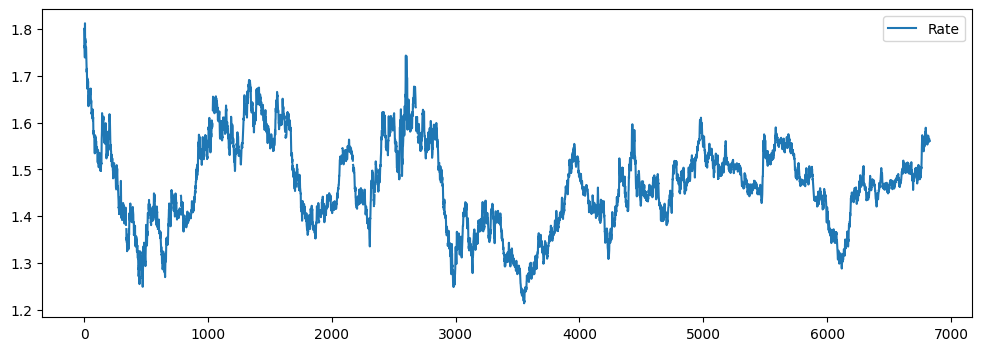

In [61]:
CADEUR.plot(figsize=(12,4))

## Another Example

### Istanbul Municipality Data 

In [62]:
# data = pd.read_csv('https://data.ibb.gov.tr/tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/ea8daee8-62e4-4c42-903f-15b5e372d902/download/hourly_transportation_202410.csv')
# data = pl.read_csv('../data/hourly_transportation_202410.csv',separator=',')
data = pd.read_csv('../data/hourly_transportation_202410.csv',sep=',')

data

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,product_kind,transaction_type_desc,town,line_name,station_poi_desc_cd
0,2024-10-01,0,1,OTOYOL,CEBECI - TAKSIM,Normal,3,3,TAM,Tam Kontur,SARIYER,36T,NaN
1,2024-10-01,0,1,OTOYOL,USKUDAR-GUZELTEPE-UMRANIYE DEVLET HASTANESI,Aktarma,2,2,INDIRIMLI1,Indirimli Aktarma,BAKIRKOY,15B,NaN
2,2024-10-01,0,1,OTOYOL,SARIYER-HACIOSMAN-MECIDIYEKOY-TAKSIM,Normal,1,1,TAM,Tam Abonman,KAGITHANE,25G,NaN
3,2024-10-01,0,1,OTOYOL,YESILPINAR - ALIBEYKOY METRO,Aktarma,1,1,TAM,Tam Aktarma,BAKIRKOY,TM10,NaN
4,2024-10-01,0,1,OTOYOL,UMRANIYE DEV.HAST-CAKMAK MAH-ATASEHIR-USTBOSTANCI,Aktarma,1,1,INDIRIMLI2,Indirimli Tip 2 Aktarma,BAKIRKOY,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770714,2024-10-18,23,1,OTOYOL,AVCILAR-ZINCIRLIKUYU,Normal,2,2,INDIRIMLI2,Indirimli Tip 2 Kontur,ESENYURT,34,BEYLIKDUZU BELEDIYESI
2770715,2024-10-18,23,2,RAYLI,EMINONU-ALIBEYKOY,Normal,1,1,INDIRIMLI2,Indirimli Tip 2 Abonman,FATIH,T5,ALIBEYKOY METRO
2770716,2024-10-18,23,1,OTOYOL,SAHINTEPE - AVCILAR-CIHANGIR MAH.,Aktarma,5,5,INDIRIMLI1,Indirimli Aktarma,KUCUKCEKMECE,147,NaN
2770717,2024-10-18,23,1,OTOYOL,CEVIZLIBAG - SOGUTLUCESME,Normal,1,1,UCRETSIZ,Ucretsiz,KADIKOY,34A,FIKIRTEPE


In [63]:
data.columns

Index(['transition_date', 'transition_hour', 'transport_type_id', 'road_type',
       'line', 'transfer_type', 'number_of_passage', 'number_of_passenger',
       'product_kind', 'transaction_type_desc', 'town', 'line_name',
       'station_poi_desc_cd'],
      dtype='object')

Pandas is very capable of doing a lot of stuff...

In [64]:
data['transition_date'] = pd.to_datetime(data['transition_date'])
data

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,product_kind,transaction_type_desc,town,line_name,station_poi_desc_cd
0,2024-10-01,0,1,OTOYOL,CEBECI - TAKSIM,Normal,3,3,TAM,Tam Kontur,SARIYER,36T,NaN
1,2024-10-01,0,1,OTOYOL,USKUDAR-GUZELTEPE-UMRANIYE DEVLET HASTANESI,Aktarma,2,2,INDIRIMLI1,Indirimli Aktarma,BAKIRKOY,15B,NaN
2,2024-10-01,0,1,OTOYOL,SARIYER-HACIOSMAN-MECIDIYEKOY-TAKSIM,Normal,1,1,TAM,Tam Abonman,KAGITHANE,25G,NaN
3,2024-10-01,0,1,OTOYOL,YESILPINAR - ALIBEYKOY METRO,Aktarma,1,1,TAM,Tam Aktarma,BAKIRKOY,TM10,NaN
4,2024-10-01,0,1,OTOYOL,UMRANIYE DEV.HAST-CAKMAK MAH-ATASEHIR-USTBOSTANCI,Aktarma,1,1,INDIRIMLI2,Indirimli Tip 2 Aktarma,BAKIRKOY,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770714,2024-10-18,23,1,OTOYOL,AVCILAR-ZINCIRLIKUYU,Normal,2,2,INDIRIMLI2,Indirimli Tip 2 Kontur,ESENYURT,34,BEYLIKDUZU BELEDIYESI
2770715,2024-10-18,23,2,RAYLI,EMINONU-ALIBEYKOY,Normal,1,1,INDIRIMLI2,Indirimli Tip 2 Abonman,FATIH,T5,ALIBEYKOY METRO
2770716,2024-10-18,23,1,OTOYOL,SAHINTEPE - AVCILAR-CIHANGIR MAH.,Aktarma,5,5,INDIRIMLI1,Indirimli Aktarma,KUCUKCEKMECE,147,NaN
2770717,2024-10-18,23,1,OTOYOL,CEVIZLIBAG - SOGUTLUCESME,Normal,1,1,UCRETSIZ,Ucretsiz,KADIKOY,34A,FIKIRTEPE


In [65]:
subset = data[['transition_date','transition_hour','road_type','number_of_passenger','number_of_passage']]
subset

,transition_date,transition_hour,road_type,number_of_passenger,number_of_passage
0,2024-10-01,0,OTOYOL,3,3
1,2024-10-01,0,OTOYOL,2,2
2,2024-10-01,0,OTOYOL,1,1
3,2024-10-01,0,OTOYOL,1,1
4,2024-10-01,0,OTOYOL,1,1
...,...,...,...,...,...
2770714,2024-10-18,23,OTOYOL,2,2
2770715,2024-10-18,23,RAYLI,1,1
2770716,2024-10-18,23,OTOYOL,5,5
2770717,2024-10-18,23,OTOYOL,1,1


In [66]:
subset['number_of_passage'].groupby(subset['road_type']).sum()

road_type
DENİZ       796232
OTOYOL    20992851
RAYLI     17271100
Name: number_of_passage, dtype: int64

<Axes: xlabel='transition_hour'>

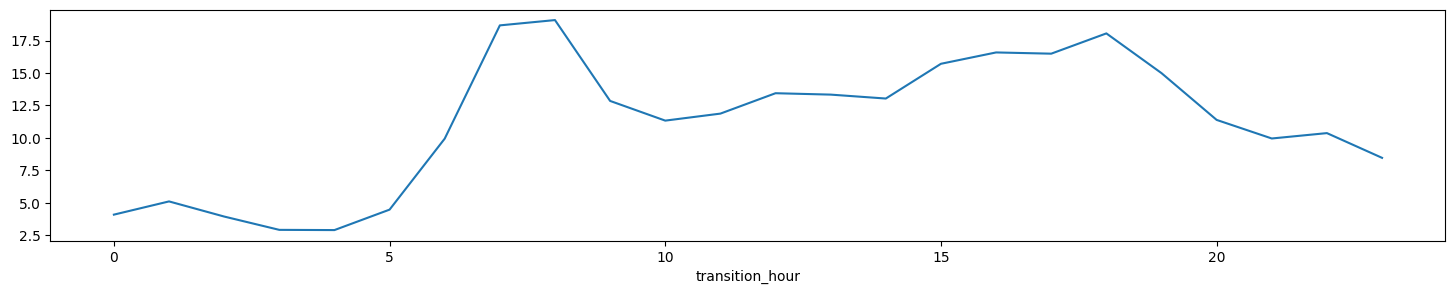

In [67]:
subset['number_of_passage'].groupby(subset['transition_hour']).mean().plot(figsize=(18,3))

<Axes: xlabel='transition_hour'>

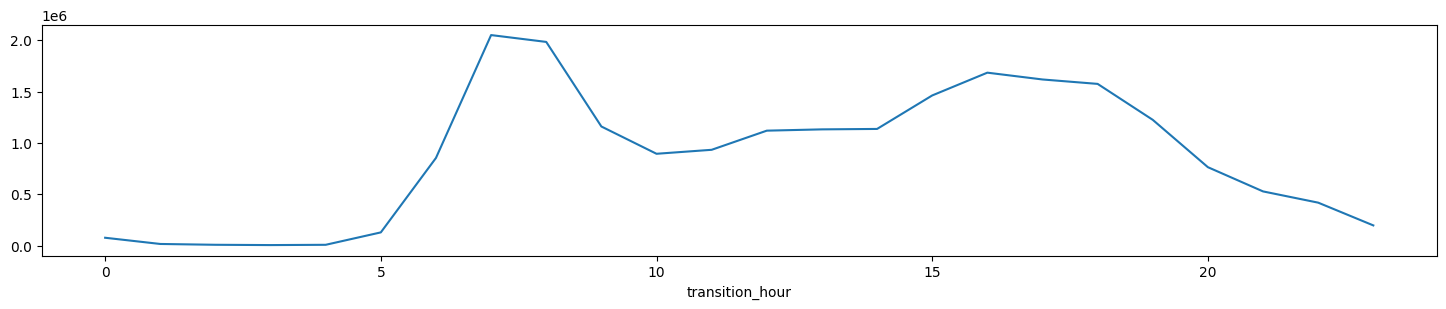

In [68]:
subset['number_of_passage'][ subset['road_type'] == "OTOYOL" ].groupby(subset['transition_hour']).sum().plot(figsize=(18,3))

<Axes: xlabel='transition_hour'>

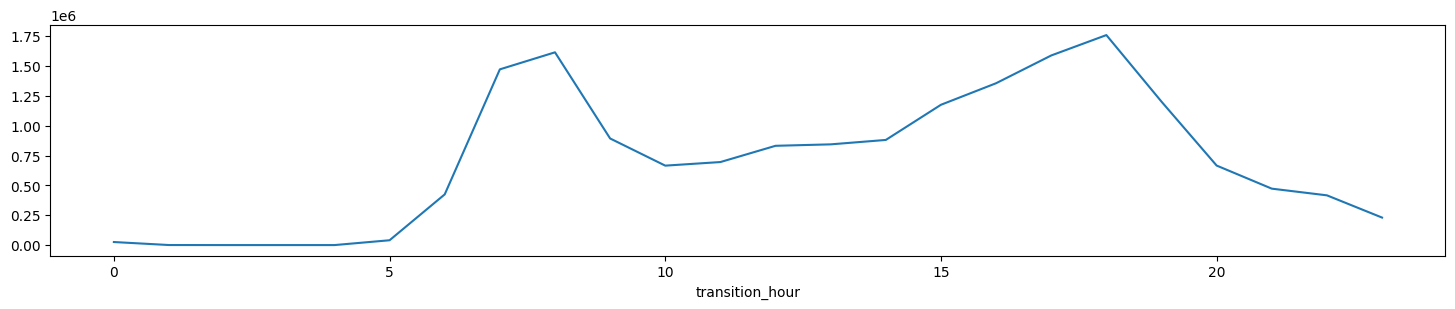

In [69]:
subset.query('road_type=="RAYLI"')['number_of_passage'].groupby(subset['transition_hour']).sum().plot(figsize=(18,3))

<Axes: xlabel='transition_hour'>

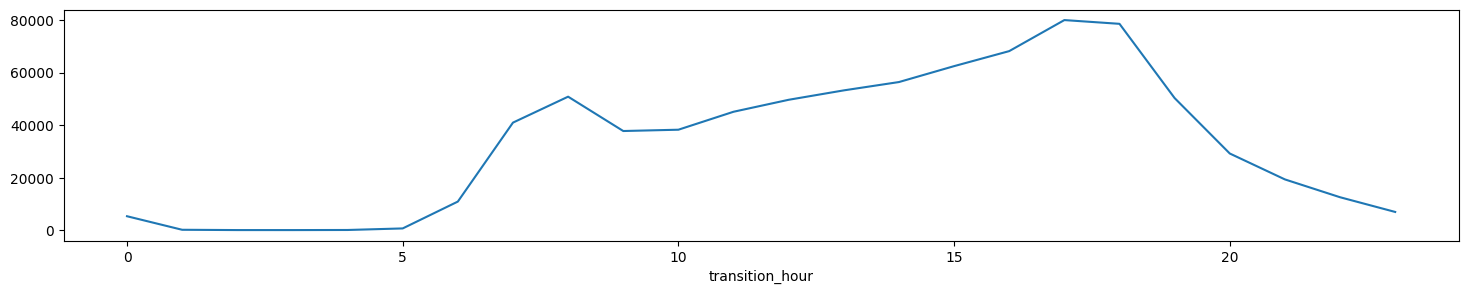

In [70]:
subset.query('road_type=="DENİZ"')['number_of_passage'].groupby(subset['transition_hour']).sum().plot(figsize=(18,3))

## DuckDB and SQL: Embedded Analytical Queries in Python

SQL (Structured Query Language) remains the most widely used language for data analysis in practice. Data scientists often interact with relational databases, query engines, and data lakes using SQL. Traditionally, this required external database servers such as PostgreSQL or MySQL.

**DuckDB** changes this model. It is an in-process analytical SQL database designed for OLAP-style workloads, offering:

* Embedded SQL execution within Python (no server required).
* Zero configuration, zero dependencies.
* Native support for querying `pandas` and `polars` DataFrames.
* Fast query engine optimized for columnar processing and analytics.

DuckDB allows you to seamlessly switch between imperative Python (`pandas`) and declarative SQL, making it ideal for data science workflows that mix both paradigms.

### Using DuckDB with pandas and polars

DuckDB can query `pandas` and `polars` DataFrames directly by name.

In [139]:
NETFLIX = yf.download('NFLX')
NETFLIX.columns = NETFLIX.columns.droplevel('Ticker')
NETFLIX.columns.name = None
NETFLIX = NETFLIX.reset_index()
NETFLIX

[*********************100%***********************]  1 of 1 completed


,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200
...,...,...,...,...,...,...
5792,2025-05-30,1207.229980,1211.810059,1180.930054,1198.329956,4696800
5793,2025-06-02,1218.979980,1219.400024,1196.250000,1201.199951,2294200
5794,2025-06-03,1217.939941,1229.569946,1211.180054,1219.869995,2363800
5795,2025-06-04,1239.660034,1242.560059,1219.880005,1220.729980,2359400


In [142]:
import duckdb

duckdb.sql("SELECT Date, Close, Volume FROM NETFLIX where Date > '2024-01-01'")

┌─────────────────────┬────────────────────┬─────────┐
│        Date         │       Close        │ Volume  │
│    timestamp_ns     │       double       │  int64  │
├─────────────────────┼────────────────────┼─────────┤
│ 2024-01-02 00:00:00 │              468.5 │ 5049400 │
│ 2024-01-03 00:00:00 │   470.260009765625 │ 3443700 │
│ 2024-01-04 00:00:00 │  474.6700134277344 │ 3636500 │
│ 2024-01-05 00:00:00 │ 474.05999755859375 │ 2612500 │
│ 2024-01-08 00:00:00 │  485.0299987792969 │ 3675800 │
│ 2024-01-09 00:00:00 │  482.0899963378906 │ 3526800 │
│ 2024-01-10 00:00:00 │  478.3299865722656 │ 4342400 │
│ 2024-01-11 00:00:00 │  492.2300109863281 │ 7993300 │
│ 2024-01-12 00:00:00 │  492.1600036621094 │ 4996600 │
│ 2024-01-16 00:00:00 │   481.239990234375 │ 4679000 │
│          ·          │           ·        │    ·    │
│          ·          │           ·        │    ·    │
│          ·          │           ·        │    ·    │
│ 2025-05-22 00:00:00 │  1187.969970703125 │ 1861600 │
│ 2025-05-

In [144]:
duckdb.query("""
    SELECT 
        EXTRACT(YEAR FROM Date) AS Year,
        EXTRACT(MONTH FROM Date) AS Month,
        AVG(Close) AS Avg_Close,
        AVG(Volume) AS Avg_Volume
    FROM NETFLIX
    GROUP BY Year, Month
    ORDER BY Year, Month
""").to_df()

,Year,Month,Avg_Close,Avg_Volume
0,2002,5,1.135834,2.464677e+07
1,2002,6,1.038071,3.709510e+06
2,2002,7,1.110000,3.345936e+06
3,2002,8,0.870974,2.949227e+06
4,2002,9,0.828071,2.787470e+06
...,...,...,...,...
273,2025,2,1009.793679,3.759437e+06
274,2025,3,940.854283,5.420890e+06
275,2025,4,983.150952,5.848790e+06
276,2025,5,1168.312855,3.581429e+06


### Why Use DuckDB?

* Ideal for **medium-size analytics** in-memory (100MB–10GB).
* Makes SQL accessible without requiring external database servers.
* Interoperable with `pandas`, `polars`, Arrow, Parquet, and CSV.
* Excellent tool for teaching **SQL semantics** in the context of modern data science tools.


| Feature        | pandas            | polars           | duckdb                      |
| -------------- | ----------------- | ---------------- | --------------------------- |
| API            | imperative Python | functional/lazy  | SQL (declarative)           |
| Performance    | moderate          | high             | high (columnar, vectorized) |
| Joins          | manual            | supported        | native SQL joins            |
| SQL support    | none              | none             | full SQL                    |
| Ideal use case | small dataframes  | large dataframes | SQL-first analytics         |


### IBB Example Reconsidered

<Axes: >

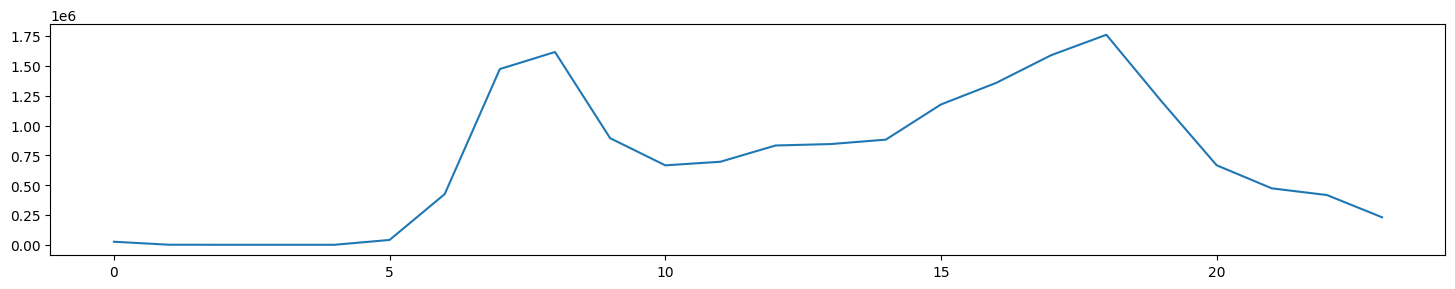

In [76]:
result = db.sql("""
  select sum(number_of_passage) as total, transition_hour as hour 
     from data
     where road_type = 'RAYLI'
     group by hour
     order by hour
""").to_df()

result['total'].plot(figsize=(18,3))

## Network Analysis

Here is another interesting thing you can do with this data:

In [77]:
lines = db.sql("""
    select line, sum(number_of_passenger) as passengers from data
       group by line
       order by passengers desc
""").to_df()
lines

,line,passengers
0,AVCILAR-ZINCIRLIKUYU,3667754.0
1,HALKALI - GEBZE,3080010.0
2,YENIKAPI - HACIOSMAN,2482138.0
3,KABATAS-BAGCILAR,1738230.0
4,YENIKAPI - HAVALIMANI,1688646.0
...,...,...
831,BEYLIKDUZU - AVCILAR,24.0
832,KARTAL-MECIDIYEKOY-SISLI,7.0
833,YESILPINAR-OTOGAR,4.0
834,BINEVLER-YENIKAPI,3.0


In [78]:
edges = []
for x in lines.itertuples():
    tmp = [y.strip() for y in re.split('-|–|/',x[1])]
    if len(tmp) == 2:
        edges.append(tuple(tmp))
    elif len(tmp)>2:
        for aa in combinations(tmp,2):
            edges.append(tuple(aa))
edges

[('AVCILAR', 'ZINCIRLIKUYU'),
 ('HALKALI', 'GEBZE'),
 ('YENIKAPI', 'HACIOSMAN'),
 ('KABATAS', 'BAGCILAR'),
 ('YENIKAPI', 'HAVALIMANI'),
 ('USKUDAR', 'CEKMEKOY'),
 ('KADIKOY', 'KARTAL'),
 ('KABATAS', 'MAHMUTBEY'),
 ('TOPKAPI', 'HABIBLER'),
 ('KIRAZLI', 'BASAKSEHIR'),
 ('KIRAZLI', 'METROKENT'),
 ('BASAKSEHIR', 'METROKENT'),
 ('CEVIZLIBAG', 'SOGUTLUCESME'),
 ('BOSTANCI', 'DUDULLU'),
 ('BAHARIYE', 'OLIMPIYAT'),
 ('EMINONU', 'ALIBEYKOY'),
 ('TUZLA', 'TOPKAPI'),
 ('KADIKOY', 'FINDIKLI MAHALLESI'),
 ('KADIKOY', 'YEDITEPE UNIVERSITESI'),
 ('FINDIKLI MAHALLESI', 'YEDITEPE UNIVERSITESI'),
 ('GUNESLI', 'BEYAZIT'),
 ('SULTANBEYLI(M.SINAN)', 'ADLIYE'),
 ('SULTANBEYLI(M.SINAN)', 'KARTAL DEV.HST'),
 ('ADLIYE', 'KARTAL DEV.HST'),
 ('GAYRETTEPE', 'ISTANBUL YENI HAVALIMA'),
 ('UMRANIYE DEV.HAST', 'CAKMAK MAH'),
 ('UMRANIYE DEV.HAST', 'ATASEHIR'),
 ('UMRANIYE DEV.HAST', 'USTBOSTANCI'),
 ('CAKMAK MAH', 'ATASEHIR'),
 ('CAKMAK MAH', 'USTBOSTANCI'),
 ('ATASEHIR', 'USTBOSTANCI'),
 ('USKUDAR', 'GUZELTEPE'),
 (

In [79]:
G = nx.from_edgelist(set(edges))
gv.vis(G)

In [80]:
res = nx.centrality.betweenness_centrality(G)
list(sorted(res.items(), key=lambda item: -item[1]))[:10]

[('KADIKOY', 0.19386406665421851),
 ('TAKSIM', 0.148971334760232),
 ('MECIDIYEKOY', 0.14721455214588394),
 ('EMINONU', 0.14105555040859957),
 ('USKUDAR', 0.10438609015112953),
 ('KARTAL', 0.09416563480351244),
 ('ALIBEYKOY METRO', 0.08927790119058132),
 ('KABATAS', 0.06673596969185014),
 ('SULTANBEYLI', 0.05518878309459211),
 ('SISLI', 0.05243264636396585)]

## Scikit-Learn: A Unified Interface for Statistical Learning in Python

In the context of data science and applied machine learning, one is frequently concerned with estimating predictive functions from data under constraints of generalizability, computational efficiency, and interpretability. The Python library [scikit-learn](https://scikit-learn.org/) (also written as `sklearn`) serves as a comprehensive, extensible, and high-level interface for specifying, training, validating, and deploying statistical learning models within this framework.

Scikit-learn provides a standardized programmatic interface to a broad collection of machine learning models, along with procedures for model selection, preprocessing, dimensionality reduction, and performance evaluation.

### Architectural Philosophy

The fundamental design principle of scikit-learn is the estimator API, which unifies learning algorithms under a common object-oriented structure. Every learning algorithm is implemented as a Python class that exposes at least the following methods:

* `.fit(X, y)` — fits the estimator to data $X \in \mathbb{R}^{n \times d}$, with optional labels $y \in \mathbb{R}^n$.
* `.predict(X)` — returns the learned function's output on unseen data.
* `.transform(X)` — (for unsupervised or preprocessing estimators) returns a modified representation of $X$.
* `.score(X, y)` — returns a scalar performance metric on test data, typically accuracy or $R^2$.

This uniformity allows complex pipelines of estimation and transformation to be built through composition and modular substitution.


### Model Classes

Scikit-learn covers a wide range of model classes, grouped semantically as follows:

* **Linear models**: including ordinary least squares, ridge regression, logistic regression, Lasso.
* **Support Vector Machines (SVMs)**: for classification and regression via kernel methods.
* **Decision Trees and Ensemble Methods**: including Random Forests, AdaBoost, and Gradient Boosted Trees.
* **Nearest Neighbors**: $k$-NN classifiers and regressors.
* **Bayesian Models**: naïve Bayes classifiers, Gaussian mixture models.
* **Unsupervised Learning**: PCA, kernel PCA, k-means clustering, spectral clustering.
* **Model Selection and Validation**: cross-validation procedures, grid/random search, scoring metrics.

Each of these models adheres to the estimator API, making them interoperable in pipelines.

### Feature Engineering and Preprocessing

Before applying a learning algorithm, data typically undergoes preprocessing to ensure compatibility and enhance model performance. Scikit-learn includes tools for:

* Standardization (mean 0, variance 1) and normalization.
* Encoding categorical variables via one-hot or ordinal schemes.
* Polynomial feature generation for non-linear models.
* Missing value imputation.
* Dimensionality reduction (e.g., PCA, LDA).

These transformations are also implemented as estimators and can be chained using the `Pipeline` class, which abstracts sequences of transformations followed by estimation.

### Model Selection and Evaluation

Scikit-learn provides rigorous utilities for:

* **Cross-validation**: including $k$-fold, stratified, and leave-one-out methods.
* **Hyperparameter tuning**: via grid search (`GridSearchCV`) and randomized search (`RandomizedSearchCV`).
* **Metric-based evaluation**: such as accuracy, precision, recall, F1, ROC AUC, and various regression metrics (MSE, MAE, $R^2$).

All procedures integrate tightly with the estimator interface and allow nested validation procedures to avoid overfitting.

### Computational Considerations

Scikit-learn is built on NumPy and SciPy, and implements efficient compiled code via Cython. It is not designed for large-scale distributed computation (as TensorFlow or PyTorch are), but it is highly effective for medium-scale problems ($n \lesssim 10^5$) where interpretability and reproducibility are key.

For high-dimensional data or sparse representations (e.g., text classification), scikit-learn supports compressed data structures (e.g., `scipy.sparse` matrices) natively in many estimators.


### An Example: Principal Component Analysis (PCA) on the Iris Dataset

Principal Component Analysis (PCA) is an unsupervised linear transformation technique that projects high-dimensional data onto a lower-dimensional affine subspace that maximizes variance. Given a centered data matrix $X \in \mathbb{R}^{n \times d}$, PCA solves the following optimization problem:

$$
\text{maximize } \mathrm{Tr}(W^\top X^\top X W) \quad \text{subject to } W^\top W = I_k,
$$

where $W \in \mathbb{R}^{d \times k}$ is the orthonormal matrix of principal components, and $k < d$ is the desired number of dimensions.

In this example, we reduce the four-dimensional Iris dataset to two principal components for visualization purposes.

In [83]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data        # shape (150, 4)
y = iris.target      # class labels: 0, 1, 2
target_names = iris.target_names

# Fit PCA to reduce from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # shape (150, 2)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.92461872 0.05306648]


This prints the proportion of total variance captured by each principal component. The result satisfies:

$$
\sum_{i=1}^k \frac{\lambda_i}{\sum_{j=1}^d \lambda_j} = \text{explained variance ratio},
$$

where $\lambda_i$ are the eigenvalues of the empirical covariance matrix of $X$.

## Visualizing data

### MatPlotLib

For static visualization, [mathplotlib](https://matplotlib.org/) is going to be the main library we are going to use.


<Figure size 1800x600 with 0 Axes>

Text(0.5, 0, 'First Principal Component')

Text(0, 0.5, 'Second Principal Component')

Text(0.5, 1.0, 'PCA of the Iris Dataset')

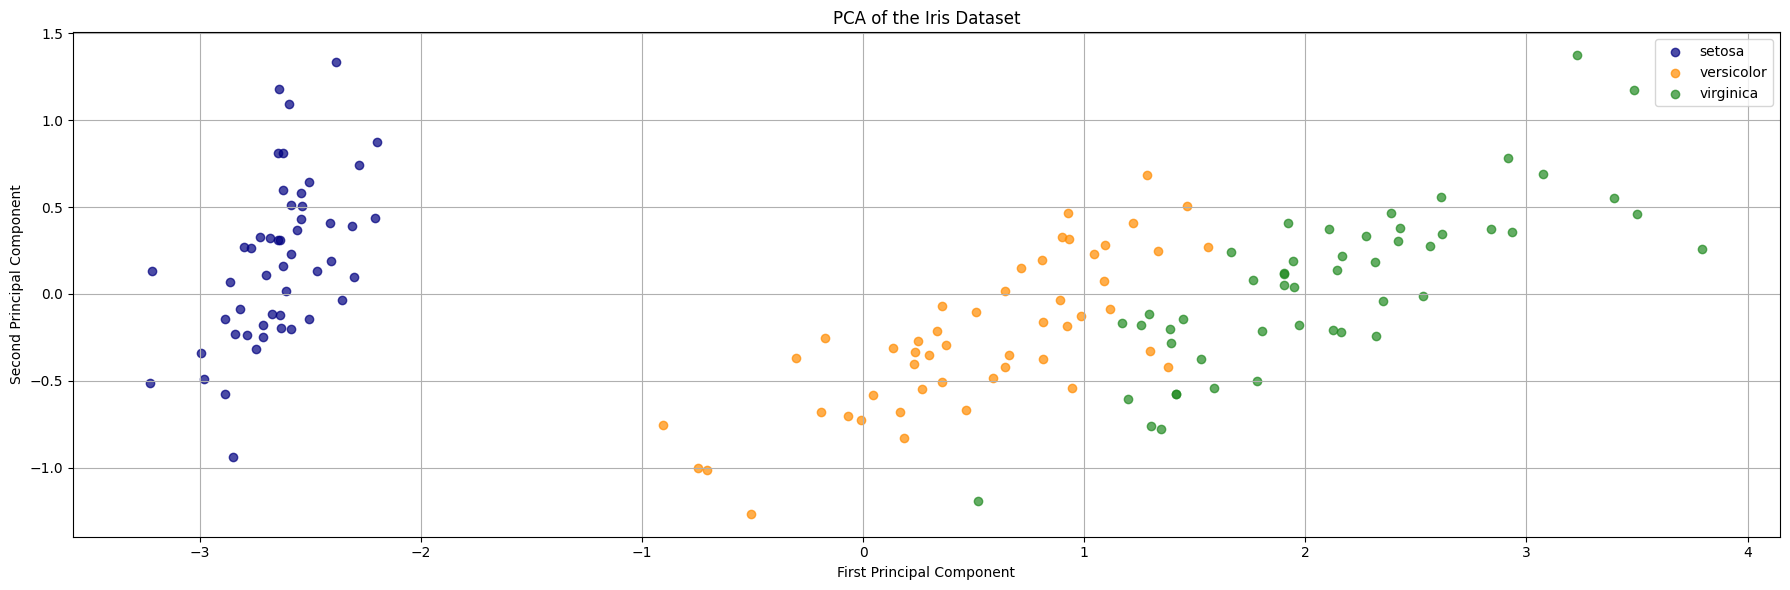

In [85]:
# Scatter plot of the PCA projection

plt.figure(figsize=(18,6))
colors = ['navy', 'darkorange', 'forestgreen']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.7, color=color, label=target_name)

plt.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of the Iris Dataset')
plt.grid(True)
plt.tight_layout()
plt.show()

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,2
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


<Figure size 1800x600 with 0 Axes>

Text(0.5, 0, 'First LDA Component')

Text(0, 0.5, 'Second LDA Component')

Text(0.5, 1.0, 'LDA Projection of the Iris Dataset')

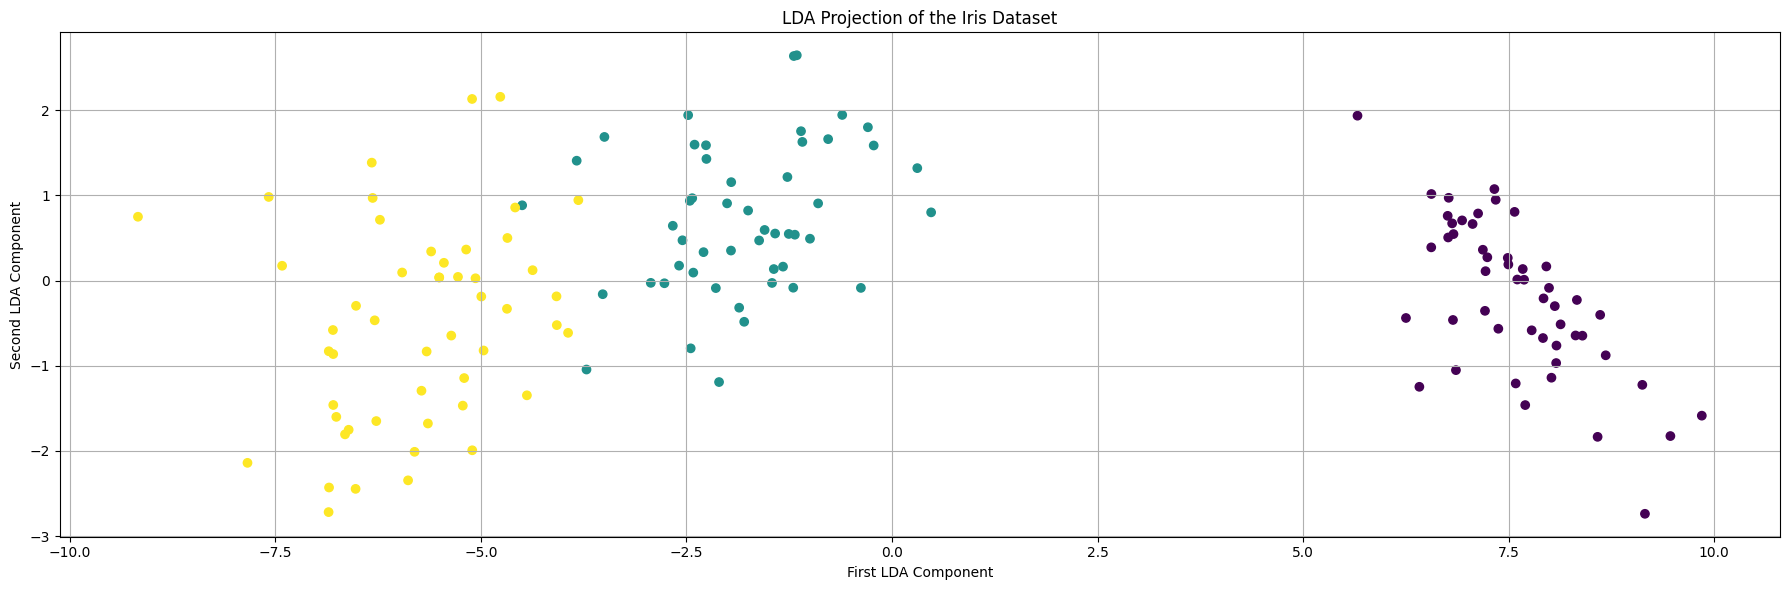

In [88]:
projection = LDA(n_components=2)
projection.fit(iris['data'], y=iris['target'])
transformed = projection.transform(iris['data'])
projected_data = pd.DataFrame(transformed,columns=['X','Y'])
projected_data['Species'] = iris['target']

plt.figure(figsize=(18,6))
plt.scatter(projected_data['X'],projected_data['Y'],c=iris['target'])
plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.title('LDA Projection of the Iris Dataset')
plt.grid(True)
plt.tight_layout()
plt.show()

### Altair and Interactive Visualizations

For interactive visualization we have [altair](https://altair-viz.github.io/) which is based on a visualization framework called [vega](https://vega.github.io/).


In [89]:
projected_data['Name'] = [ iris['target_names'][i] for i in projected_data['Species'] ]

alt.Chart(projected_data).mark_circle(size=60).encode(
    x='X',
    y='Y',
    color = {'field': 'Name',
             'scale': {'scheme': 'category10' }
            },
    tooltip=['Name']
).properties(
    title = 'Scatter plot of Iris Dataset after PCA',
    width = 800,
    height = 400
).interactive()

alt.Chart(...)

## StatsModels Library

For specialized statistical work, there is a library called [StatsModels](https://www.statsmodels.org/stable/index.html) library.


While modern machine learning emphasizes predictive accuracy, often at the expense of model interpretability, classical statistics is concerned with the **estimation**, **hypothesis testing**, and **inference** of model parameters under specific probabilistic assumptions. The Python library **`statsmodels`** provides a comprehensive suite of tools for building and analyzing such **parametric statistical models**, making it the natural counterpart to `scikit-learn` for inferential tasks.

Where `scikit-learn` abstracts learning algorithms behind a unified, prediction-oriented API, `statsmodels` exposes the full structure of statistical models, including access to the **estimated parameters**, **standard errors**, **confidence intervals**, **p-values**, and **diagnostic statistics**.


Let us consider a linear regression model as a canonical example:

$$
Y = X \beta + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I),
$$

where $Y \in \mathbb{R}^n$ is the response vector, $X \in \mathbb{R}^{n \times p}$ is the design matrix of explanatory variables, $\beta \in \mathbb{R}^p$ is the unknown parameter vector, and $\varepsilon$ is an i.i.d. Gaussian noise vector. The goal is to **estimate** $\beta$, **test hypotheses** about its components, and **construct confidence intervals**.

Whereas `scikit-learn` would return only an estimated function $\hat{f}(x) = x^\top \hat{\beta}$, `statsmodels` furnishes the full statistical machinery associated with the likelihood-based estimation of $\beta$ and $\sigma^2$, as well as tools for inference under classical assumptions.

### Model Classes and Supported Families

`statsmodels` supports a variety of statistical models, most of which fall under the framework of **parametric estimation** via Maximum Likelihood or Generalized Least Squares:

* **Linear models**: Ordinary Least Squares (OLS), Generalized Least Squares (GLS), Weighted Least Squares (WLS).
* **Generalized Linear Models (GLMs)**: Logistic regression, Poisson regression, Gamma regression, etc.
* **Robust models**: robust regression estimators (Huber, RANSAC).
* **Time series models**: AR, MA, ARIMA, SARIMAX, state-space models.
* **Nonparametric methods**: kernel density estimation, lowess.
* **Discrete models**: Probit, Logit, Poisson.
* **Survival and duration models**: Cox proportional hazards, Weibull models.
* **Mixed models**: Linear Mixed Effects, Generalized Estimating Equations (GEE).

Each model class provides detailed output beyond point predictions, including:

* parameter estimates $\hat{\beta}$,
* standard errors $\hat{\sigma}_{\hat{\beta}}$,
* $t$- and $z$-statistics,
* p-values and significance tests,
* confidence intervals for each coefficient,
* model fit diagnostics (AIC, BIC, log-likelihood, condition number).

### API Design and Usage

Unlike `scikit-learn`, which emphasizes object-oriented pipelines, `statsmodels` adopts a formula-based interface reminiscent of R’s `lm()` or `glm()` functions, along with lower-level matrix-based constructors.

A typical modeling workflow proceeds as follows:

In [149]:
import statsmodels.api as sm

X_raw = NETFLIX['Close']
Y = NETFLIX['Volume']

# Matrix-style interface
X = sm.add_constant(X_raw)      # manually add intercept
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     607.1
Date:                Fri, 06 Jun 2025   Prob (F-statistic):          1.45e-127
Time:                        14:00:28   Log-Likelihood:            -1.0490e+05
No. Observations:                5797   AIC:                         2.098e+05
Df Residuals:                    5795   BIC:                         2.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.934e+07   2.85e+05     67.760      0.000    1.88e+07    1.99e+07
Close      -2.429e+04    985.888    -24.639      0.000   -2.62e+04   -2.24e+04
==============================================================================
Omnibus:                     6227.240   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           679926.890
Skew:                           5.289   Prob(JB):                         0.00
Kurtosis:                      54.991   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferential Perspective

`statsmodels` is designed with the following statistical assumptions in mind:

* Models are specified explicitly by their parametric form.
* Estimators are derived via likelihood or quasi-likelihood.
* Inference is conducted under asymptotic normality or finite-sample distributions.
* Diagnostic plots and tests (e.g., Q-Q plots, residual analysis) are integral to model validation.

These features make `statsmodels` the tool of choice when the goal is not only to **predict**, but also to **explain** and **test**.

### Comparison with scikit-learn

| Feature                 | statsmodels                              | scikit-learn                  |
| ----------------------- | ---------------------------------------- | ----------------------------- |
| Primary goal            | Inference, interpretation                | Prediction, generalization    |
| API style               | formula-based + matrix                   | object-oriented estimator API |
| Output                  | full statistical report (p-values, CI)   | predictions, loss scores      |
| Statistical assumptions | explicit (likelihood-based)              | implicit (model-specific)     |
| Best use case           | hypothesis testing, confidence intervals | predictive pipelines, tuning  |